# At the end of this lesson you will learn

 - The main characteristics of the time series
  - Seasonality, Stationarity, smooth series

 - Make predictions using Facebook Prophet Library

 https://medium.com/mlearning-ai/multivariate-time-series-forecasting-using-fbprophet-66147f049e66

 https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

 https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [ ]:
# !pip install pymeeus
# !pip install ephem
# !pip install pystan
!pip install prophet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from prophet import Prophet

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
weather = pd.read_csv('/content/sample_data/Barcelona_weather.csv', sep = ';')
weather.drop('dt_iso', axis = 1, inplace = True)
weather.head(3)

,dt,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,3600,Barcelona,41.387397,2.168568,14.63,10000.0,5.96,13.61,13.77,...,14.4,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
1,1514768400,3600,Barcelona,41.387397,2.168568,13.31,10000.0,3.67,12.05,11.67,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
2,1514772000,3600,Barcelona,41.387397,2.168568,12.35,10000.0,3.83,11.10,9.67,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44509 entries, 0 to 44508
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   44509 non-null  int64  
 1   timezone             44509 non-null  int64  
 2   city_name            44509 non-null  object 
 3   lat                  44509 non-null  float64
 4   lon                  44509 non-null  float64
 5   temp                 44509 non-null  float64
 6   visibility           43472 non-null  float64
 7   dew_point            44509 non-null  float64
 8   feels_like           44509 non-null  float64
 9   temp_min             44509 non-null  float64
 10  temp_max             44509 non-null  float64
 11  pressure             44509 non-null  int64  
 12  sea_level            0 non-null      float64
 13  grnd_level           0 non-null      float64
 14  humidity             44509 non-null  int64  
 15  wind_speed           44509 non-null 

In [5]:
weather['date'] = pd.to_datetime(weather['dt'],unit='s')
weather = weather[['date','temp','feels_like','pressure','humidity','wind_speed','rain_1h']]
weather['rain_1h'].fillna(0, inplace = True)
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
weather

,date,temp,feels_like,pressure,humidity,wind_speed,rain_1h,year,month
0,2018-01-01 00:00:00,14.63,13.61,1018,56,9.30,0.0,2018,1
1,2018-01-01 01:00:00,13.31,12.05,1019,52,6.70,0.0,2018,1
2,2018-01-01 02:00:00,12.35,11.10,1020,56,6.70,0.0,2018,1
3,2018-01-01 03:00:00,10.77,9.23,1021,51,7.72,0.0,2018,1
4,2018-01-01 04:00:00,11.96,10.60,1022,53,8.75,0.0,2018,1
...,...,...,...,...,...,...,...,...,...
44504,2023-01-01 19:00:00,12.73,12.41,1025,90,1.54,0.0,2023,1
44505,2023-01-01 20:00:00,12.28,11.91,1025,90,3.10,0.0,2023,1
44506,2023-01-01 21:00:00,12.28,11.86,1024,88,4.10,0.0,2023,1
44507,2023-01-01 22:00:00,11.96,11.48,1024,87,4.10,0.0,2023,1


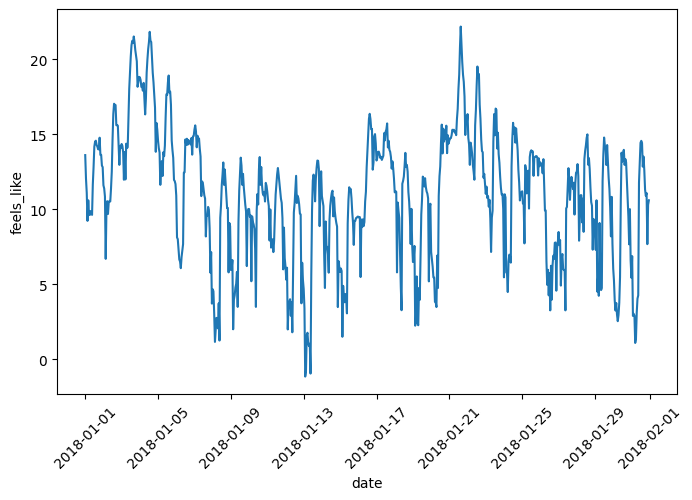

In [41]:
weather_2018 = weather[(weather['year'] == 2018) & (weather['month'] == 1)]

plt.figure(figsize=(8, 5))
sns.lineplot(data = weather_2018, x = 'date', y = 'feels_like')
plt.xticks(rotation=45);


## Stationarity

Stationarity is an important characteristic of time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has **constant mean and variance**, and covariance is independent of time.

Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.

## Seasonality

Seasonality refers to periodic fluctuations. For example, electricity consumption is high during the day and low during night, or online sales increase during Christmas before slowing down again.

## Smoothing the series

It is used in time series analysis to reduce noise and reveal underlying patterns or trends in the data.

**Moving Average**: It involves calculating the average of a specific number of neighboring data points (often called the window or span) and using this average value as a smoothed data point.

**Exponential smoothing**: It assigns exponentially decreasing weights to older observations, emphasizing more recent data points.

#### Moving Average

In [6]:
# Calculate the moving average using a window of 7 (for example)
window = 24
weather['Moving_Avg'] = weather['feels_like'].rolling(window=window).mean()


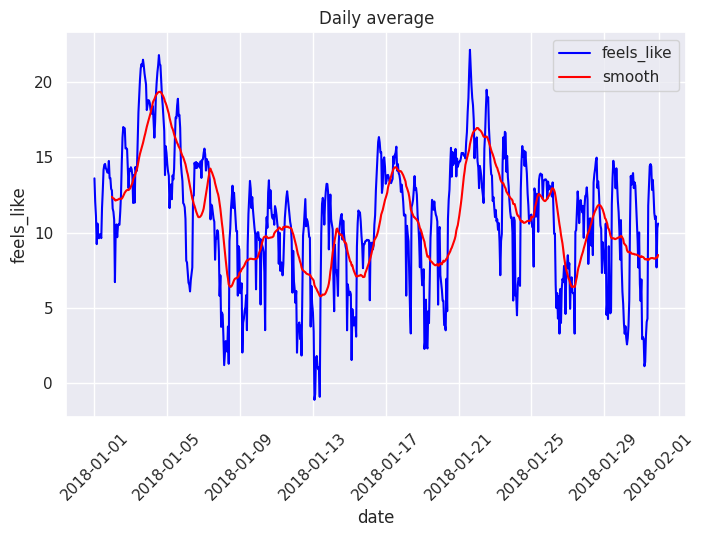

In [65]:
weather_2018 = weather[(weather['year'] == 2018) & (weather['month'] == 1)]

plt.figure(figsize=(8, 5))
sns.lineplot(data = weather_2018, x = 'date', y = 'feels_like', c = 'blue', label = 'feels_like')
sns.lineplot(data = weather_2018, x = 'date', y = 'Moving_Avg', c = 'red', label = 'smooth')
plt.title('Daily average')
plt.legend()
plt.xticks(rotation=45);

#### Exponential smoothing

In [63]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):

    plt.figure(figsize=(10,6))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

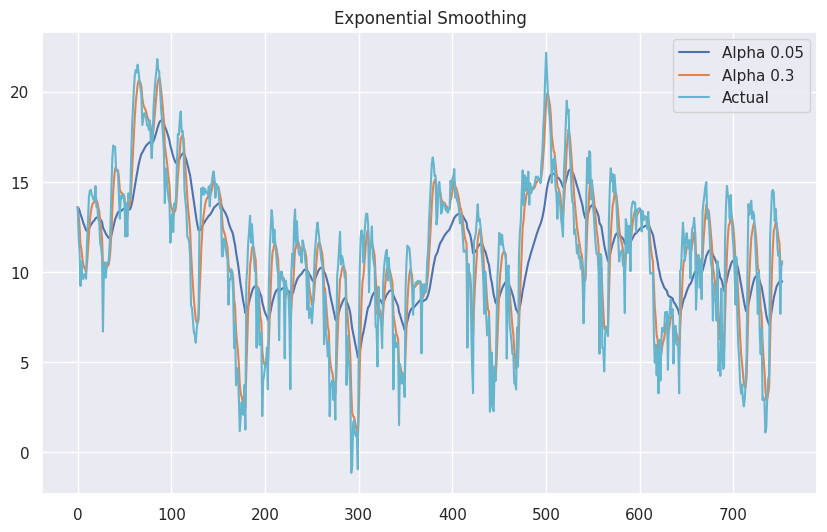

In [64]:
plot_exponential_smoothing(weather_2018.feels_like, [0.05, 0.3])

## Training a Time Series Model with Prophet

https://facebook.github.io/prophet/docs/quick_start.html

Prophet is an open-source forecasting tool created by Facebook's Core Data Science team. It is designed for forecasting time series data that displays patterns on different time scales, such as daily, weekly, and yearly patterns.


In the next steps let's train a model to forecast the feature feels_like. Firstly, only taking into account this variable. Then, we will use other regressors as predictors, mainly the temperature, air pressure or humidity.



### Train test Split

Unlike other ML algorithms the split train-test is not made randomly. When training time series models we use the first X time lapses for training and we validate with the next time lapses.

In our exemple we train the model using data from 2018 until the end of 2021, and we validate it using data from 2022 (until the end of the series, June 2023)

In [9]:

weather_train = weather[weather['date']< '2022-01-01']
weather_test = weather[weather['date']>= '2022-01-01']

weather_train.drop(['rain_1h','year','month','Moving_Avg'], axis = 1, inplace = True)
weather_test.drop(['rain_1h','year','month','Moving_Avg'], axis = 1, inplace = True)

weather_train.columns = ['ds','temp','y','pressure','humidity','wind_speed']
weather_test.columns = ['ds','temp','y','pressure','humidity','wind_speed']

In [10]:
weather_train.head(3)

,ds,temp,y,pressure,humidity,wind_speed
0,2018-01-01 00:00:00,14.63,13.61,1018,56,9.3
1,2018-01-01 01:00:00,13.31,12.05,1019,52,6.7
2,2018-01-01 02:00:00,12.35,11.10,1020,56,6.7


### Data preparation

Prophet requires specific data types and names for the input features, especifically, 'ds' for the time feature and 'y' for the predictive variable.

ds must be datetime format.

If our data is not already prepared we have to do it

In [8]:
weather_train.dtypes

ds            datetime64[ns]
temp                 float64
y                    float64
pressure               int64
humidity               int64
wind_speed           float64
dtype: object

### Training the first Prophet model

In [11]:
model = Prophet()
model.fit(weather_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp900g_88u/hsazc6zg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp900g_88u/164q5fej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14612', 'data', 'file=/tmp/tmp900g_88u/hsazc6zg.json', 'init=/tmp/tmp900g_88u/164q5fej.json', 'output', 'file=/tmp/tmp900g_88u/prophet_modelbwk1t5m_/prophet_model-20231018101305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:14:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
# forecast_fl_tr = model.predict(weather_train)
forecast_fl_ts = model.predict(weather_test)

In [ ]:
forecast_fl_ts

In [11]:
forecast_fl_ts = forecast_fl_ts[['ds','yhat','yhat_lower','yhat_upper']]
forecast_fl_ts.head(3)

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01 00:00:00,6.654903,3.274270,10.096504
1,2022-01-01 01:00:00,6.276283,2.897005,9.645832
2,2022-01-01 02:00:00,5.860120,2.521740,9.424127


In [12]:
forecast_fl_ts = forecast_fl_ts.merge(weather_test, on = 'ds', how = 'inner')
forecast_fl_ts[['ds','y','yhat','yhat_lower','yhat_upper','temp','pressure','humidity','wind_speed']]

,ds,y,yhat,yhat_lower,yhat_upper,temp,pressure,humidity,wind_speed
0,2022-01-01 00:00:00,11.69,6.654903,3.274270,10.096504,12.12,1026,88,2.57
1,2022-01-01 01:00:00,11.89,6.276283,2.897005,9.645832,12.50,1027,80,2.57
2,2022-01-01 02:00:00,11.86,5.860120,2.521740,9.424127,12.54,1026,77,1.79
3,2022-01-01 03:00:00,12.25,5.476409,2.048448,9.135595,13.01,1026,72,2.68
4,2022-01-01 03:00:00,12.25,5.476409,2.048448,9.135595,13.01,1026,72,2.68
...,...,...,...,...,...,...,...,...,...
9070,2023-01-01 19:00:00,12.41,9.330225,-11.129459,31.129904,12.73,1025,90,1.54
9071,2023-01-01 20:00:00,11.91,8.702617,-10.665744,30.788935,12.28,1025,90,3.10
9072,2023-01-01 21:00:00,11.86,8.257974,-11.461167,30.401907,12.28,1024,88,4.10
9073,2023-01-01 22:00:00,11.48,7.953378,-11.460731,29.572812,11.96,1024,87,4.10


In [13]:

print("MAE: ", metrics.mean_absolute_error(forecast_fl_ts['y'], forecast_fl_ts['yhat']).round(4))
print("MSE: ", metrics.mean_squared_error(forecast_fl_ts['y'], forecast_fl_ts['yhat']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(forecast_fl_ts['y'], forecast_fl_ts['yhat'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(forecast_fl_ts['y'], forecast_fl_ts['yhat']).round(4))

MAE:  2.3936
MSE:  9.1866
RMSE:  3.0309
MAPE:  0.2078


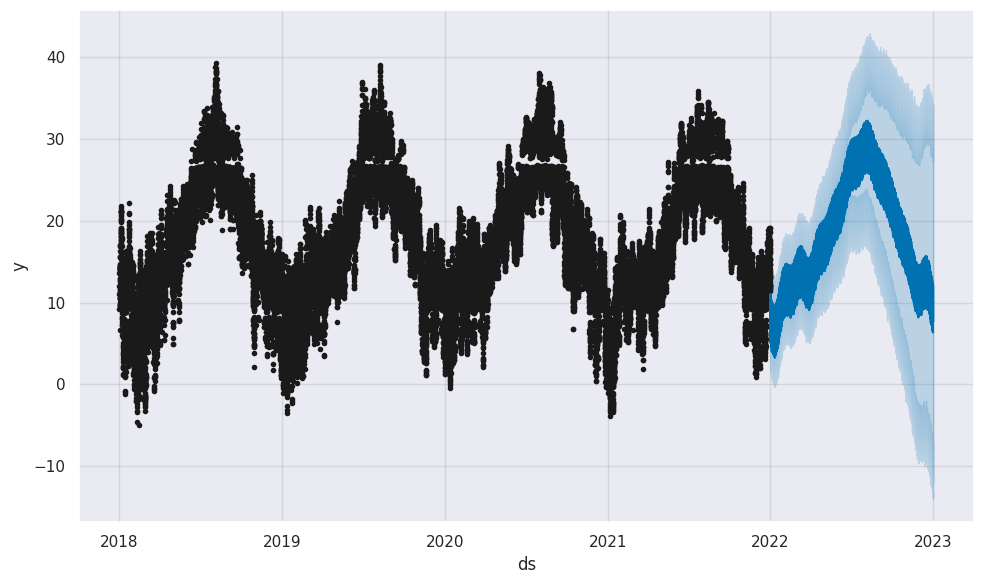

In [14]:
model.plot(forecast_fl_ts)
plt.show()

## Training model with several regressors

Now let's add some exogenous regressor to have better predictions

In [15]:
model_add = Prophet()
model_add.add_regressor('temp')
model_add.add_regressor('pressure')
model_add.add_regressor('humidity')
model_add.add_regressor('wind_speed')
model_add.fit(weather_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4oe2nf5p/vs8w_y_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4oe2nf5p/gbbppqdj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61282', 'data', 'file=/tmp/tmp4oe2nf5p/vs8w_y_1.json', 'init=/tmp/tmp4oe2nf5p/gbbppqdj.json', 'output', 'file=/tmp/tmp4oe2nf5p/prophet_model1klec9lh/prophet_model-20231018043913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:39:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:39:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
forecast_fl_ts_add = model_add.predict(weather_test)

In [17]:
forecast_fl_ts_add = forecast_fl_ts_add[['ds','yhat','yhat_lower','yhat_upper']]
forecast_fl_ts_add

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01 00:00:00,11.069901,10.361262,11.808125
1,2022-01-01 01:00:00,11.289268,10.579287,12.053868
2,2022-01-01 02:00:00,11.291287,10.545058,12.092696
3,2022-01-01 03:00:00,11.679685,10.967544,12.431924
4,2022-01-01 03:00:00,11.679685,10.900440,12.454723
...,...,...,...,...
8874,2023-01-01 19:00:00,11.818593,8.252308,14.960508
8875,2023-01-01 20:00:00,11.174621,7.843693,14.328022
8876,2023-01-01 21:00:00,11.067369,7.596388,14.138493
8877,2023-01-01 22:00:00,10.641604,7.170963,13.777280


In [18]:
forecast_fl_ts_add = forecast_fl_ts_add.merge(weather_test, on = 'ds', how = 'inner')
forecast_fl_ts_add[['ds','y','yhat','yhat_lower','yhat_upper','temp','pressure','humidity','wind_speed']]

,ds,y,yhat,yhat_lower,yhat_upper,temp,pressure,humidity,wind_speed
0,2022-01-01 00:00:00,11.69,11.069901,10.361262,11.808125,12.12,1026,88,2.57
1,2022-01-01 01:00:00,11.89,11.289268,10.579287,12.053868,12.50,1027,80,2.57
2,2022-01-01 02:00:00,11.86,11.291287,10.545058,12.092696,12.54,1026,77,1.79
3,2022-01-01 03:00:00,12.25,11.679685,10.967544,12.431924,13.01,1026,72,2.68
4,2022-01-01 03:00:00,12.25,11.679685,10.967544,12.431924,13.01,1026,72,2.68
...,...,...,...,...,...,...,...,...,...
9070,2023-01-01 19:00:00,12.41,11.818593,8.252308,14.960508,12.73,1025,90,1.54
9071,2023-01-01 20:00:00,11.91,11.174621,7.843693,14.328022,12.28,1025,90,3.10
9072,2023-01-01 21:00:00,11.86,11.067369,7.596388,14.138493,12.28,1024,88,4.10
9073,2023-01-01 22:00:00,11.48,10.641604,7.170963,13.777280,11.96,1024,87,4.10


In [19]:
print("MAE: ", metrics.mean_absolute_error(forecast_fl_ts_add['y'], forecast_fl_ts_add['yhat']).round(4))
print("MSE: ", metrics.mean_squared_error(forecast_fl_ts_add['y'], forecast_fl_ts_add['yhat']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(forecast_fl_ts_add['y'], forecast_fl_ts_add['yhat'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(forecast_fl_ts_add['y'], forecast_fl_ts_add['yhat']).round(4))

MAE:  0.4953
MSE:  0.5937
RMSE:  0.7705
MAPE:  0.0369


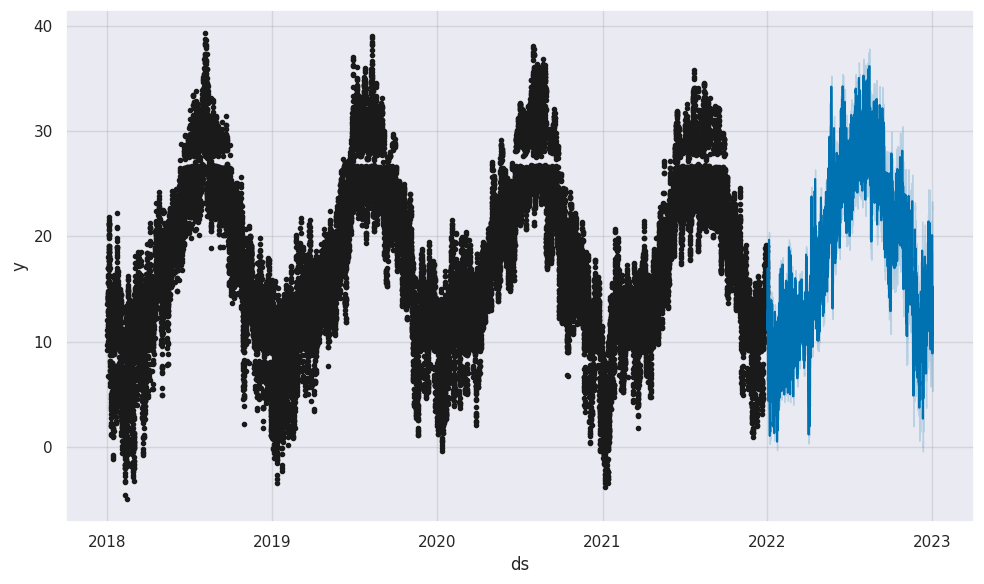

In [21]:
model_add.plot(forecast_fl_ts_add)
plt.show()

## Tunable parameters in Prophet

Prophet, the forecasting tool developed by Facebook, has a few tunable parameters that can be adjusted to improve the accuracy of the forecasts. Here are some of the key tunable parameters in Prophet:

**changepoint_prior_scale** (default=0.05): This parameter controls the flexibility of the automatic changepoint detection in Prophet. A higher value makes the trend more flexible and can fit to smaller changes in the data, but it might also lead to overfitting. Lower values make the trend less sensitive to small fluctuations.

**seasonality_prior_scale** (default=10.0): This parameter controls the strength of the seasonality model. Higher values allow the model to fit the seasonal patterns more closely, while lower values smooth out the seasonal components. It's especially useful when your data has strong weekly or yearly patterns.

**holidays_prior_scale** (default=10.0): This parameter determines the flexibility of the holiday effects. If you have included holidays in your model, adjusting this parameter can make the model more or less sensitive to the effects of holidays.

**seasonality_mode** (default='additive'): Prophet supports two types of seasonalities: additive and multiplicative. Additive means the seasonal components are added to the trend to get the forecast, while multiplicative means they are multiplied. Depending on your data, you might need to switch between these modes to find the best fit.

**daily_seasonality** (default='auto'): Prophet automatically detects daily seasonality in the data. Setting this parameter to False disables daily seasonality, and setting it to True enforces daily seasonality. You can also set it to a number (e.g., 10) to control the number of Fourier components used for daily seasonality.

In [ ]:
model_tunable = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=5.0, holidays_prior_scale=15.0,
                seasonality_mode='multiplicative', daily_seasonality=True)
model_tunable.fit(weather_train)